CAPÍTULO 11 - Tipo de dado datetime
-


Este capítulo ira abordar os tipos de dados datetime, e como podemos trablhar com datas e horas

Este capítulo abordará:

 1. A biblioteca embutida datetime de python
 2. conversão de strings em cada uma data
 3. Formatação de datas
 4. Extração dos componentes data
 5. Cálculos com datas
 6. Como trabalhar com datas em um DataFrame
 7. Reamostragem
 8. Como trabalhar com fusos horários

11.2 Objeto datetime de python

Python tem um objeto datetime embutito que se econtra na biblioteca datetime.  
O date time permite manipular datas e horas e até mesmo fazer cálculos com elas

In [102]:
from datetime import datetime

#obtém a data e hora atual
now = datetime.now()
print(now)

2024-06-21 12:03:09.592208


In [103]:
#podemos criar nosso próprio datetime manualmente

t1 = datetime.now()
t2 = datetime(2001, 9, 11, 9, 3)

print(t1)
print(t2)

2024-06-21 12:03:09.606799
2001-09-11 09:03:00


In [104]:
#operações matemáticas feitas com datas

diff = t1 - t2
print(diff)

8319 days, 3:00:09.606799


11.3 Converção para datetime

Para converter um object para datetime podemos usar a função to_datetime. Vamos usar o conjunto de dados ebola para fazer isso

In [105]:
import pandas as pd

ebola = pd.read_csv('../../data/country_timeseries.csv')

print(ebola.iloc[:5, :5])

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
0    1/5/2015  289        2776.0            NaN            10030.0
1    1/4/2015  288        2775.0            NaN             9780.0
2    1/3/2015  287        2769.0         8166.0             9722.0
3    1/2/2015  286           NaN         8157.0                NaN
4  12/31/2014  284        2730.0         8115.0             9633.0


In [106]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

Podemos ver que a coluna date está codificada como um object genérico, logo podemos converter essa coluna para datetime

In [107]:
ebola['Date_dt'] = pd.to_datetime(ebola['Date'])

print(ebola.head())
print(ebola.info())

         Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone  \
0    1/5/2015  289        2776.0            NaN            10030.0   
1    1/4/2015  288        2775.0            NaN             9780.0   
2    1/3/2015  287        2769.0         8166.0             9722.0   
3    1/2/2015  286           NaN         8157.0                NaN   
4  12/31/2014  284        2730.0         8115.0             9633.0   

   Cases_Nigeria  Cases_Senegal  Cases_UnitedStates  Cases_Spain  Cases_Mali  \
0            NaN            NaN                 NaN          NaN         NaN   
1            NaN            NaN                 NaN          NaN         NaN   
2            NaN            NaN                 NaN          NaN         NaN   
3            NaN            NaN                 NaN          NaN         NaN   
4            NaN            NaN                 NaN          NaN         NaN   

   Deaths_Guinea  Deaths_Liberia  Deaths_SierraLeone  Deaths_Nigeria  \
0         1786.0          

Também podemos ser um pouco mais explícitos em como converter um object para datetime.  
datetime possui um parâmetro chamado format que permite especificar o tipo da data, neste caso temo uma data mês/dia/ano

In [108]:
ebola['Date_dt'] = pd.to_datetime(ebola['Date'], format='%m/%d/%Y')

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

datetime possui algumas opções embutidasd convenientes. Exemplo, podemos definir dayfirst ou yearfirst caso a data começe com o dia ou ano, 31-01-2009 ou 2009-01-31

Para outros tipos de datas podemos especificar manualmente como elas estão representadas

11.4 Carregando dados que incluam datas

A função read_csv tem muitos parâmetros, e um deles é o parse_date, que permite fazer o parse de um object para datetime diretamente na leitura do arquivo.
Basta passar o parâmetro e informar a coluna em que a data está

In [109]:
ebola = pd.read_csv('../../data/country_timeseries.csv', parse_dates=[0])

print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

11.5 Extraindo componentes de datas

Agora que temos um objeto datetime podemos extrair qualquer parte que quisermos dessa data

In [110]:
d = pd.to_datetime('2016-02-29')
print(d)

2016-02-29 00:00:00


In [111]:
#se a única string for passada teremos um Timestamp
print(type(d),'\n')

#podemos acessar os componentes da data
print(d.year, '\n')
print(d.month, '\n')
print(d.day)

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 

2016 

2 

29


Vamos recriar a coluna date_dt para começar a manipular nossos dados do dataframe

In [112]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

print(ebola[['Date', 'date_dt']].head())

        Date    date_dt
0 2015-01-05 2015-01-05
1 2015-01-04 2015-01-04
2 2015-01-03 2015-01-03
3 2015-01-02 2015-01-02
4 2014-12-31 2014-12-31


In [113]:
#podemos criar novas colunas com ano mês e dia

ebola['year'], ebola['month'], ebola['day'] = (ebola['date_dt'].dt.year,
                                               ebola['date_dt'].dt.month,
                                               ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

        Date    date_dt  year  month  day
0 2015-01-05 2015-01-05  2015      1    5
1 2015-01-04 2015-01-04  2015      1    4
2 2015-01-03 2015-01-03  2015      1    3
3 2015-01-02 2015-01-02  2015      1    2
4 2014-12-31 2014-12-31  2014     12   31


Quando fizemos o parse de nossas datas o type não foi preservado

In [114]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

11.6 Cáculos com datas e timedeltas

Uma das vantagens de objetos do tipo data é que podemos fazer cálculos com eles.  
Nosso conjunto de dados possui uma coluna chamada Day que informa há quantos dias   
ocorre o surto de Ebola em um país. Podemos recrias essa coluna usando aritimética com datas

In [115]:
print(ebola.iloc[-5:, :5])

          Date  Day  Cases_Guinea  Cases_Liberia  Cases_SierraLeone
117 2014-03-27    5         103.0            8.0                6.0
118 2014-03-26    4          86.0            NaN                NaN
119 2014-03-25    3          86.0            NaN                NaN
120 2014-03-24    2          86.0            NaN                NaN
121 2014-03-22    0          49.0            NaN                NaN


Se quisermos achar a data mais antiga, no caso do dataframe o primeiro dia de surto podemos usar a função min na coluna

In [116]:
print(ebola['date_dt'].min())

2014-03-22 00:00:00


In [117]:
#usando a data para cáculos
ebola['outbreak_d'] = ebola['date_dt'] - ebola['date_dt'].min()

print(ebola[['Date', 'Day', 'outbreak_d']])

          Date  Day outbreak_d
0   2015-01-05  289   289 days
1   2015-01-04  288   288 days
2   2015-01-03  287   287 days
3   2015-01-02  286   286 days
4   2014-12-31  284   284 days
..         ...  ...        ...
117 2014-03-27    5     5 days
118 2014-03-26    4     4 days
119 2014-03-25    3     3 days
120 2014-03-24    2     2 days
121 2014-03-22    0     0 days

[122 rows x 3 columns]


In [118]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 122 non-null    datetime64[ns] 
 1   Day                  122 non-null    int64          
 2   Cases_Guinea         93 non-null     float64        
 3   Cases_Liberia        83 non-null     float64        
 4   Cases_SierraLeone    87 non-null     float64        
 5   Cases_Nigeria        38 non-null     float64        
 6   Cases_Senegal        25 non-null     float64        
 7   Cases_UnitedStates   18 non-null     float64        
 8   Cases_Spain          16 non-null     float64        
 9   Cases_Mali           12 non-null     float64        
 10  Deaths_Guinea        92 non-null     float64        
 11  Deaths_Liberia       81 non-null     float64        
 12  Deaths_SierraLeone   87 non-null     float64        
 13  Deaths_Nigeria      

Quando fazemos cálculos com objetos datetime obtemos um objeto timedelta

11.7 Métodos de datetime

Vamos observar outro conjunto de dados. Esse conjunto trata de falências bancárias

Date_format
-
    Nas versões atuais do Pandas ao ler um arquivo csv e passar as colunas, você precisa inserir um formato para elas usando 'date_format'  
    esse parâmetro aceita uma string única, informando o formato da data que será passado para todas as colunas, ou
    você pode optar por passar um dict com a coluna e o formato que ela recebe, ou o formato para uma lista das 
    colunas que vão receber

In [126]:
banks = pd.read_csv('../../data/banklist.csv', parse_dates=[5,6], date_format={'Closing Date': '%d-%b-%y', 'Updated Date': '%d-%b-%y'})
print(banks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Bank Name              553 non-null    object        
 1   City                   553 non-null    object        
 2   ST                     553 non-null    object        
 3   CERT                   553 non-null    int64         
 4   Acquiring Institution  553 non-null    object        
 5   Closing Date           553 non-null    datetime64[ns]
 6   Updated Date           553 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 30.4+ KB
None


In [127]:
banks = pd.read_csv('../../data/banklist.csv', parse_dates=[5,6], date_format='%d-%b-%y')
print(banks.head())
print(banks.info())

                                           Bank Name                City  ST  \
0                                Fayette County Bank          Saint Elmo  IL   
1  Guaranty Bank, (d/b/a BestBank in Georgia & Mi...           Milwaukee  WI   
2                                     First NBC Bank         New Orleans  LA   
3                                      Proficio Bank  Cottonwood Heights  UT   
4                      Seaway Bank and Trust Company             Chicago  IL   

    CERT                Acquiring Institution Closing Date Updated Date  
0   1802            United Fidelity Bank, fsb   2017-05-26   2017-07-26  
1  30003  First-Citizens Bank & Trust Company   2017-05-05   2017-07-26  
2  58302                         Whitney Bank   2017-04-28   2017-07-26  
3  35495                    Cache Valley Bank   2017-03-03   2017-05-18  
4  19328                  State Bank of Texas   2017-01-27   2017-05-18  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 553 entries, 0 to 552
Dat

Agora podemos fazer parse das datas obtendo o trimestre e o ano em que o banco fechou

In [130]:
banks['closing_quarter'], banks['closing_year'] = (banks['Closing Date'].dt.quarter,
                                                   banks['Closing Date'].dt.year)

print(banks[['Closing Date','closing_quarter', 'closing_year']])

    Closing Date  closing_quarter  closing_year
0     2017-05-26                2          2017
1     2017-05-05                2          2017
2     2017-04-28                2          2017
3     2017-03-03                1          2017
4     2017-01-27                1          2017
..           ...              ...           ...
548   2001-07-27                3          2001
549   2001-05-03                2          2001
550   2001-02-02                1          2001
551   2000-12-14                4          2000
552   2000-10-13                4          2000

[553 rows x 3 columns]


In [132]:
#Também podemos cálcular quantos bancos fecharam no ano
closingYear = banks.groupby(['closing_year']).size()

print(closingYear)

closing_year
2000      2
2001      4
2002     11
2003      3
2004      4
2007      3
2008     25
2009    140
2010    157
2011     92
2012     51
2013     24
2014     18
2015      8
2016      5
2017      6
dtype: int64


In [134]:
#podemos ainda, cálcular quantos bancos fecharam em cada trimestre de cada ano
closingYear_q = banks.groupby(['closing_year', 'closing_quarter']).size()
print(closingYear_q)

closing_year  closing_quarter
2000          4                   2
2001          1                   1
              2                   1
              3                   2
2002          1                   6
              2                   2
              3                   1
              4                   2
2003          1                   1
              2                   1
              4                   1
2004          1                   3
              2                   1
2007          1                   1
              3                   1
              4                   1
2008          1                   2
              2                   2
              3                   9
              4                  12
2009          1                  21
              2                  24
              3                  50
              4                  45
2010          1                  41
              2                  45
              3                  4

Podemos plotar esses resultados

<function matplotlib.pyplot.show(close=None, block=None)>

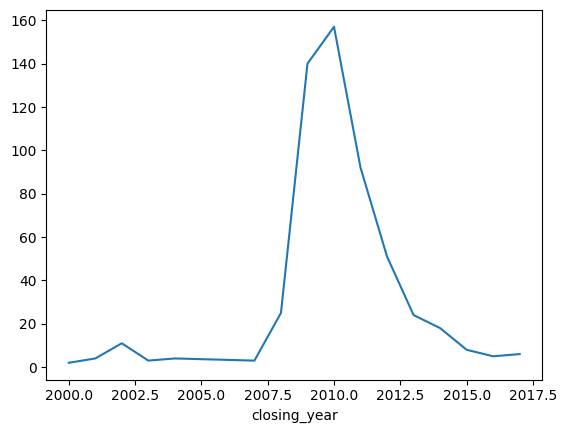

In [135]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax = closingYear.plot()
plt.show

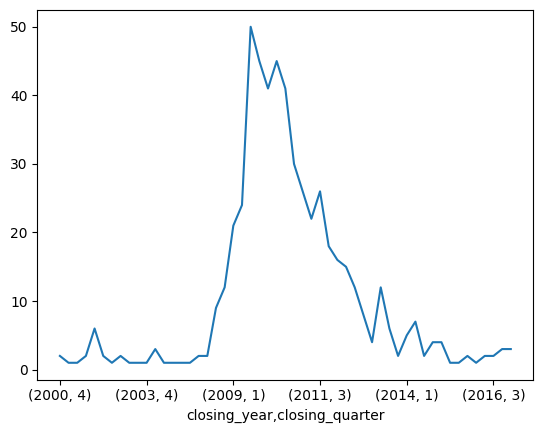

In [136]:
fig, ax = plt.subplots()
ax = closingYear_q.plot()
plt.show()

11.8 Obtendo dados de ações

two hundred eigthy-seven